In [322]:
import jax.numpy as np
import numpy as onp
from jax.scipy.stats import norm
import jax
from jax import random
import matplotlib.pyplot as plt


mu, sigma = 6, 3
noise_mu, noise_sigma = 6.2, 2.8
no_of_sample = 10000

In [323]:
inputs = onp.random.normal(mu, sigma, no_of_sample)
noise = onp.random.normal(noise_mu, noise_sigma, no_of_sample)

The loss is given by
$$loss(\theta)=-\frac{1}{2 T} \sum_{t} \ln \left[h\left(\mathbf{x}_{t} ; \theta\right)\right]+\ln \left[1-h\left(\mathbf{y}_{t} ; \theta\right)\right]$$
where, $T=10000$ and
$$
\begin{aligned}
h(\mathbf{u} ; \theta) &=\frac{1}{1+\exp [-G(\mathbf{u} ; \theta)]} \\
G(\mathbf{u} ; \theta) &=\ln p_{m}(\mathbf{u} ; \theta)-\ln p_{n}(\mathbf{u})
\end{aligned}
$$

In our case, $$\ln p_m(x; \theta) = \ln c  -\frac{(x-\mu^2)}{2 \sigma^2}$$ and $\theta = (\ln c, \mu, \ln \sigma)$

And $$\ln p_n(u) = \ln \mathcal{N}(u; 0, 30^2)$$

In [324]:
def logistic_fn(x):
    return 1/(1+np.exp(-x))

def log_unlormalized_pdf(x, mu_param, log_sigma_param, log_c_param):
    sigma = np.exp(log_sigma_param)
    return log_c_param - (x-mu_param)**2/(2*sigma**2)
#     return - (x-mu_param)**2/(2*sigma**2)

def obj_fun(mu_param, log_sigma_param, log_c_param):
    global inputs
    G_input = log_unlormalized_pdf(inputs, mu_param, log_sigma_param, log_c_param) - np.log(norm.pdf(inputs, noise_mu, noise_sigma))
    G_noise = log_unlormalized_pdf(noise, mu_param, log_sigma_param, log_c_param) - np.log(norm.pdf(noise, noise_mu, noise_sigma))
    h_input = logistic_fn(G_input)
    h_noise = logistic_fn(G_noise)
    
    loss = np.log(h_input) + np.log(1-h_noise)
    return -.5 * (1/no_of_sample)  * np.sum(loss)
    
loss_grad = jax.grad(obj_fun, argnums=(0,1,2))

In [325]:
# Initialize parameters
mu_init, log_sigma_init, log_c_init = 0.0, 3.0, -1.0
obj_fun(mu_init, log_sigma_init, log_c_init)
loss_grad(mu_init, log_sigma_init, log_c_init)

(DeviceArray(0.00443899, dtype=float32),
 DeviceArray(0.03510869, dtype=float32),
 DeviceArray(0.2864608, dtype=float32))

In [326]:
params = mu_init, log_sigma_init, log_c_init
lr = .1
list_of_param_WRONG = []
list_loss = []
for ep in range(5000):
    loss = obj_fun(*params)
    grads = loss_grad(*params)
    list_of_param_WRONG.append(params)
    list_loss.append(onp.asarray(loss))
    params = [param - lr * grad for param, grad in zip(params, grads)]
    
    if ep % 50 ==0:
        print(f'Epoch is {ep}.......')
        print('LOSS')
        print(loss)   

Epoch is 0.......
LOSS
0.9408619
Epoch is 50.......
LOSS
0.7532815
Epoch is 100.......
LOSS
0.7325451
Epoch is 150.......
LOSS
0.7304781
Epoch is 200.......
LOSS
0.7301433
Epoch is 250.......
LOSS
0.72995836
Epoch is 300.......
LOSS
0.72977835
Epoch is 350.......
LOSS
0.7295904
Epoch is 400.......
LOSS
0.7293936
Epoch is 450.......
LOSS
0.72918904
Epoch is 500.......
LOSS
0.7289781
Epoch is 550.......
LOSS
0.72876316
Epoch is 600.......
LOSS
0.7285469
Epoch is 650.......
LOSS
0.7283328
Epoch is 700.......
LOSS
0.7281242
Epoch is 750.......
LOSS
0.7279253
Epoch is 800.......
LOSS
0.72773945
Epoch is 850.......
LOSS
0.72757
Epoch is 900.......
LOSS
0.7274187
Epoch is 950.......
LOSS
0.72728693
Epoch is 1000.......
LOSS
0.7271745
Epoch is 1050.......
LOSS
0.7270805
Epoch is 1100.......
LOSS
0.7270031
Epoch is 1150.......
LOSS
0.7269402
Epoch is 1200.......
LOSS
0.72688943
Epoch is 1250.......
LOSS
0.72684866
Epoch is 1300.......
LOSS
0.7268157
Epoch is 1350.......
LOSS
0.72678876
Epoch is

In [327]:
params

[DeviceArray(0.591562, dtype=float32),
 DeviceArray(2.051308, dtype=float32),
 DeviceArray(-2.1208768, dtype=float32)]

In [ ]:
np.exp()

In [289]:
params

[DeviceArray(5.9839797, dtype=float32),
 DeviceArray(1.1075463, dtype=float32),
 DeviceArray(-2.0294132, dtype=float32)]

In [285]:
np.exp(1.1075463)

DeviceArray(3.0269222, dtype=float32)

In [295]:
onp.asarray(np.log(1/(np.sqrt(2*np.pi)*sigma)))

array(-2.017551, dtype=float32)

In [310]:
list_of_param[10]

[DeviceArray(0.00035759, dtype=float32),
 DeviceArray(2.2085419, dtype=float32),
 DeviceArray(-1.3417336, dtype=float32)]

In [303]:
pr

DeviceArray(1.1075463, dtype=float32)

In [313]:
true_mu, true_sigma, true_norm_const = mu, sigma, 1/(onp.sqrt(2*onp.pi)*sigma)
loss_mu = []
loss_sigma = []
loss_norm_const = []
for i in range(len(list_of_param)):
    if i == 0:
        next
    else:
        pr = list_of_param[i]
        loss_mu.append((onp.asarray(pr[0])-true_mu)**2)
        loss_sigma.append((onp.asarray(np.exp(pr[1]))-true_sigma)**2)
        loss_norm_const.append((onp.asarray(np.exp(pr[2]))-true_norm_const)**2)
        

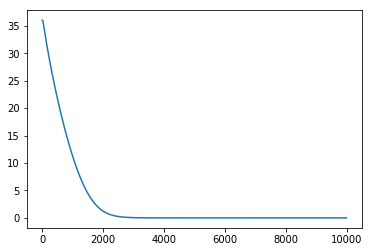

In [315]:
plt.plot(loss_mu)
plt.show()

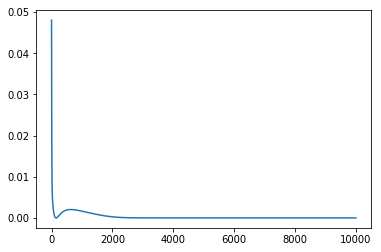

In [314]:
# plt.plot(loss_mu)
plt.plot(loss_norm_const)
plt.show()

In [291]:
list_of_param[]

[DeviceArray(-1.3313384e-05, dtype=float32),
 DeviceArray(2.9131956, dtype=float32),
 DeviceArray(-1.0438528, dtype=float32)]